### Data - Banglore housing Data 
#### Source - https://www.kaggle.com/datasets/saipavansaketh/pune-house-data?select=Bangalore++house+data.csv

## *Description*
#### The dataset contains the price of the houses in banglore,India. The datasets gives us information on land area type, availability , size , no of bedrooms , society , area (sq ft) , no of balconys , no of bathrooms and the price in lakhs 
---
 


# *Objectives*
#### ->Data Preprocessing 
#### ->Feature engineering 
#### ->Train Test Split 
#### ->Build Linear , Lasso , Ridge and Elastic Net models 
#### ->Compare the r2 score for each of the models 
#### ->Conclude which model suits best for our dataset 
---

In [41]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [42]:
# Reading the Data 
data =  pd.read_csv("Bangalore  house data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Data Cleaning 

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


<AxesSubplot:>

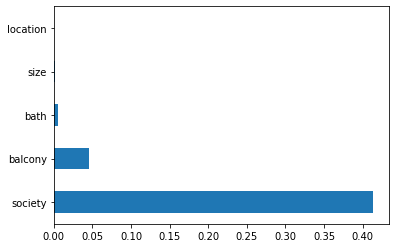

In [44]:
# finding out the number of null percentage in each columns
m = data.isnull().sum().sort_values(ascending=False)/len(data)
m[m!=0].plot(kind='barh')

Text(0.5, 1.0, '% of unique values in each col')

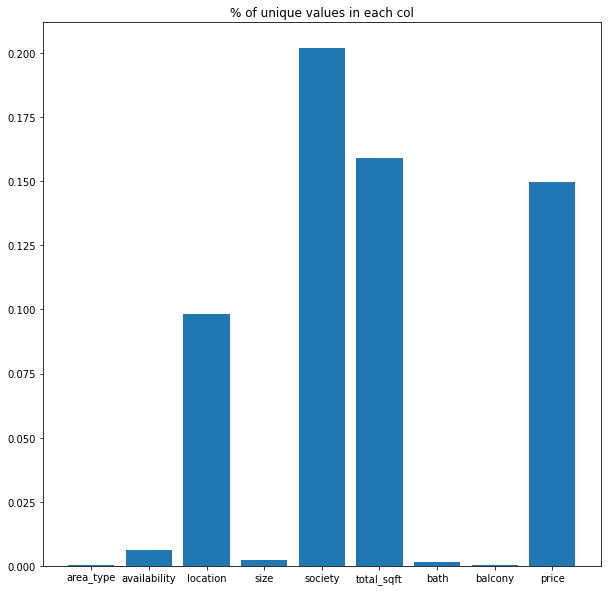

In [45]:
# Visualizing % of unique values in each col
no_of_uni_values_columns=[]
for col in data.columns:
    no_of_uni_values_columns.append(len(data[col].unique())/len(data))
plt.figure(figsize=(10,10))
plt.bar(data.columns,no_of_uni_values_columns)
plt.title("% of unique values in each col")

In [46]:
data.loc[30,'total_sqft']

'2100 - 2850'

In [47]:
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

In [48]:
def find_num(s):
    tf=0
    lst11=[]
    rlst=[]
    for i in range(0,len(data)):
        n=data.loc[i,s]
        if isfloat(n):
            tf+=1
        elif len(n)==11 and n!="45Sq. Yards" and n!="24Sq. Meter":
            lst11.append(i)
        else:
            rlst.append(i)
    return tf,lst11,rlst

In [49]:
tf,lst11,rlst=find_num('total_sqft')

In [50]:
print(data.loc[lst11,'total_sqft'])

30       2100 - 2850
56       3010 - 3410
81       2957 - 3450
122      3067 - 8156
137      1042 - 1105
            ...     
12990    1804 - 2273
13059    1200 - 1470
13240    1020 - 1130
13265    1133 - 1384
13299    2830 - 2882
Name: total_sqft, Length: 137, dtype: object


In [51]:
def convert11_num(l):
    for i in l:
        n=data.loc[i,'total_sqft']
        a=n[0:4]
        b=n[-4:]
        avg=float(a)+float(b)/2
        avg_str=str(avg)
        data.loc[i,'total_sqft']=avg_str 

In [52]:
convert11_num(lst11)

In [53]:
data.drop(rlst,axis=0,inplace=True)

In [54]:
data['total_sqft']=data['total_sqft'].astype('float64')

In [55]:
data[data['location'].isnull()].index.tolist()

[568]

In [56]:
data.drop([568],axis=0,inplace=True) 

In [57]:
m=data[data['size'].isnull()].index.tolist()
m

[579,
 1775,
 2264,
 2809,
 2862,
 5333,
 6423,
 6636,
 7680,
 8306,
 8565,
 8703,
 10634,
 11019,
 11569]

In [58]:
data.drop(m,axis=0,inplace=True) 

In [59]:
data['society']=data['society'].fillna('No Society')

In [60]:
def find_broom(s):
    emp_str=""
    for m in s:
        if m.isdigit():
            emp_str = emp_str + m
    return emp_str

In [61]:
data['size']=data['size'].apply(find_broom)
data['size']=data['size'].astype('float64')

In [62]:
m=data[data['balcony'].isnull()].index.tolist()
data.drop(m,axis=0,inplace=True) 
m=data[data['bath'].isnull()].index.tolist()
data.drop(m,axis=0,inplace=True) 

In [63]:
def avail(s):
    if s!="Ready To Move":
        s="Not Ready To Move"
    return s
data['availability'].apply(avail)

0        Not Ready To Move
1            Ready To Move
2            Ready To Move
3            Ready To Move
4            Ready To Move
               ...        
13314        Ready To Move
13315        Ready To Move
13317        Ready To Move
13318    Not Ready To Move
13319        Ready To Move
Name: availability, Length: 12610, dtype: object

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12610 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12610 non-null  object 
 1   availability  12610 non-null  object 
 2   location      12610 non-null  object 
 3   size          12610 non-null  float64
 4   society       12610 non-null  object 
 5   total_sqft    12610 non-null  float64
 6   bath          12610 non-null  float64
 7   balcony       12610 non-null  float64
 8   price         12610 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.2+ MB


## Feature Engineering 

In [65]:
one_hot_encode_cols = data.dtypes[data.dtypes == np.object]  
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  

C:\Users\HRITHI~1\AppData\Local\Temp/ipykernel_13308/3339073334.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  one_hot_encode_cols = data.dtypes[data.dtypes == np.object]


In [66]:
data = pd.get_dummies(data, columns=one_hot_encode_cols)

In [67]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
normaltest(data.price.values)

NormaltestResult(statistic=17337.442012586205, pvalue=0.0)

NormaltestResult(statistic=1483.0974306487365, pvalue=0.0)


<AxesSubplot:ylabel='Frequency'>

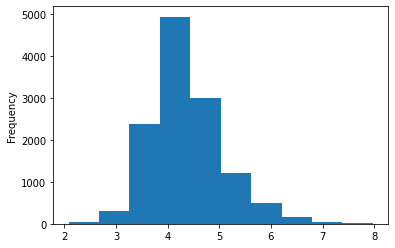

In [68]:
log_price = np.log(data.price)
print(normaltest(log_price.values))
log_price.plot(kind='hist')

---
## Linear Regression

In [69]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.3, random_state=42)

In [70]:
feature_list=[]
for col in data.columns:
    if col!="price":
        feature_list.append(col)


In [71]:
X_train= train[feature_list]
Y_train= train['price']
X_test= test[feature_list]
Y_test= test["price"]

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))
lr = LinearRegression()
lr.fit(X_train,Y_train)
y_pred = lr.predict(X_test)


In [73]:
print(rmse(Y_test,y_pred))

100.46097194296561


In [74]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)

0.46234278817825347

---
## Linear Regression with Feature Engineering (Standard Scaler)

In [75]:
X = data.drop('price',axis=1)
Y = data.price

In [76]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X_s = s.fit_transform(X)

In [77]:
# Standard Scaled
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(X_s,Y
                                                            ,test_size=0.25
                                                            ,random_state=42)
                                                                                                     

In [78]:
lr_ss= LinearRegression().fit(x_train_s,y_train_s)
y_pred_s = lr_ss.predict(x_test_s)

In [79]:
rmse(y_test_s,y_pred_s)

5.196459885218741e+16

In [80]:
r2_score(y_test_s,y_pred_s)

-1.4031052539459016e+29

---
## Ridge Regression


In [83]:
from sklearn.linear_model import RidgeCV 

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train, Y_train)



In [84]:
ridgeCV_rmse = rmse(Y_test, ridgeCV.predict(X_test))

print(ridgeCV.alpha_, ridgeCV_rmse)

3.0 93.68938269571552


In [85]:
r2_score(Y_test, ridgeCV.predict(X_test))

0.5323817208599473

## Lasso Regression


In [86]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=3).fit(X_train, Y_train)


In [87]:

lassoCV_rmse = rmse(Y_test, lassoCV.predict(X_test))
print(lassoCV.alpha_, lassoCV_rmse)  

0.0005 100.03457809010952


In [88]:
r2_score(Y_test, lassoCV.predict(X_test))

0.4668971381203416

In [89]:
print('Of {} coefficients, {} are non-zero with Lasso.'.format(len(lassoCV.coef_), 
                                                               len(lassoCV.coef_.nonzero()[0])))

Of 3924 coefficients, 2841 are non-zero with Lasso.


---
## ElasticNetCV

In [90]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4).fit(X_train, Y_train)


D:\Computer science\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9404709.147339646, tolerance: 12058.234294342745
  model = cd_fast.enet_coordinate_descent_gram(
D:\Computer science\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9333550.752418922, tolerance: 11552.686694017906
  model = cd_fast.enet_coordinate_descent_gram(
D:\Computer science\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14032.89265973866, tolerance: 12059.017432557685
  model = cd_fast.enet_coordinate_descent_gram(
D:\Computer science\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning:

KeyboardInterrupt: 

In [ ]:
elasticNetCV_rmse = rmse(Y_test, elasticNetCV.predict(X_test))
print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)